## Standard Gradient Descent

### Linear Regression Example

In [1]:
%matplotlib inline
import math, sys, os, numpy as np
from numpy.random import random, permutation
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
import keras
from keras.layers.core import Dense
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop
from keras.preprocessing import image
from sklearn.preprocessing import OneHotEncoder

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)


In [3]:
# Import our class, and instantiate
import vgg16; reload(vgg16)
from vgg16 import Vgg16

from utils import get_data, plots, confusion_matrix, plot_confusion_matrix
import bcolz

In [34]:
def lin(a, b, x): return a * x + b

In [35]:
a = 3
b = 8

In [36]:
n = 30
x = random(n)  # generate random floats array size n
y = lin(a, b, x)

In [37]:
x 

array([ 0.74  ,  0.374 ,  0.7366,  0.4865,  0.7173,  0.0225,  0.5312,  0.8414,  0.0888,  0.875 ,
        0.7348,  0.6639,  0.3828,  0.6233,  0.5127,  0.9639,  0.4852,  0.5605,  0.1926,  0.4613,
        0.946 ,  0.9909,  0.1667,  0.6321,  0.2447,  0.6485,  0.1524,  0.7109,  0.7211,  0.3992])

In [38]:
y

array([ 10.22  ,   9.1219,  10.2098,   9.4594,  10.152 ,   8.0676,   9.5936,  10.5241,   8.2665,
        10.6249,  10.2044,   9.9916,   9.1485,   9.8698,   9.5381,  10.8917,   9.4555,   9.6816,
         8.5779,   9.3838,  10.8379,  10.9727,   8.5   ,   9.8962,   8.7342,   9.9456,   8.4573,
        10.1326,  10.1632,   9.1977])

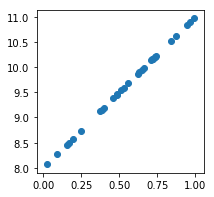

In [39]:
plt.scatter(x, y)

In [40]:
def sse(y, y_pred): return ((y - y_pred) ** 2).sum()
def loss(y, a, b, x): return sse(y, lin(a, b, x))
def avg_loss(y, a, b, x): return np.sqrt(loss(y, a, b, x) / n)

In [48]:
a_guess = 1
b_guess = 1
avg_loss(y, a_guess, b_guess, x)

8.1240

In [42]:
lr = 0.01  # learning rate
# d[avg_loss] / db = d[(y - (a * x + b)) ** 2] / db = 2(b + ax -y) = 2(y_pred - y)
# d[avg_loss] / da = d[(y - (a * x + b)) ** 2] / da = 2x (b + ax - y) = x * d[avg_loss] / db

In [43]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x * dydb
    a_guess -= lr * dyda.mean()
    b_guess -= lr * dydb.mean()

In [49]:
fig = plt.figure(dpi = 100, figsize = (5, 4))
plt.scatter(x, y)
line, = plt.plot(x, lin(a_guess, b_guess, x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess, b_guess, x))
    for i in range(100): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval = 100)
ani

## Liner Regression Example in Keras

In [4]:
# generate random (x1, x2)  30 pairs
x = random((30, 2))     
# y = 2 * x1 + 3 * x2 + 1
y = np.dot(x, [2., 3.]) + 1   
x[:5]

array([[ 0.0199,  0.6668],
       [ 0.1812,  0.7287],
       [ 0.7896,  0.4163],
       [ 0.8283,  0.8512],
       [ 0.1426,  0.9905]])

In [4]:
# Create Sequential Model with one Dense layer
lm = Sequential([Dense(1,  input_shape=(2,))])
# set optimizer as Standard Gradient Descent and loss function as Mean Square Error
lm.compile(optimizer=SGD(lr=0.1), loss='mse')

In [13]:
# loss function value by initial weights
lm.evaluate(x, y, verbose=0)

26.3737

In [20]:
# run stocastic gradient descent
# epoch is single pass through the entire traing set
lm.fit(x, y, nb_epoch=10, batch_size=1)

Epoch 1/10
30/30 [==============================] - 0s - loss: 0.0010         
Epoch 2/10
30/30 [==============================] - 0s - loss: 5.2836e-04     
Epoch 3/10
30/30 [==============================] - 0s - loss: 2.6057e-04     
Epoch 4/10
30/30 [==============================] - 0s - loss: 1.4312e-04     
Epoch 5/10
30/30 [==============================] - 0s - loss: 6.2580e-05     
Epoch 6/10
30/30 [==============================] - 0s - loss: 6.0507e-05     
Epoch 7/10
30/30 [==============================] - 0s - loss: 2.4221e-05     
Epoch 8/10
30/30 [==============================] - 0s - loss: 1.3345e-05     
Epoch 9/10
30/30 [==============================] - 0s - loss: 6.5706e-06     
Epoch 10/10
30/30 [==============================] - 0s - loss: 3.7416e-06     


In [21]:
# loss function value after weights fitting
lm.evaluate(x, y, verbose=0)

0.0000

In [22]:
#  true parameter is [2.0, 3.0] and 1.0
lm.get_weights()

[array([[ 1.9972],
        [ 2.9956]], dtype=float32), array([ 1.0038], dtype=float32)]

## Cats vs Dogs and Finetuning

### 1. Create a model that has single layer

In [15]:
path = "data/dogscats/"
model_path = path + '/models'
batch_size=64

In [5]:
vgg = Vgg16()
model = vgg.model

In [16]:
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [9]:
def save_array(fname, arr): c=bcolz.carray(arr, rootdir=fname, mode='w'); c.flush()
def load_array(fname): return bcolz.open(fname)[:]

In [18]:
# create numpy arrays which include all dataset  instead of batches
val_data = get_data(path + 'valid')
trn_data = get_data(path + 'train')

Found 2000 images belonging to 2 classes.
Found 23000 images belonging to 2 classes.


In [22]:
save_array(model_path + 'train_data.bc', trn_data)
save_array(model_path + 'valid_data.bc', val_data)

In [10]:
trn_data = load_array(model_path + 'train_data.bc')
val_data = load_array(model_path + 'valid_data.bc')

In [16]:
# image vector of each 23,000 training images
trn_data.shape

(23000, 3, 224, 224)

In [17]:
# image vector of each 2,000 training images
val_data.shape

(2000, 3, 224, 224)

In [ ]:
# predict probabirities for each data by VGG16 original model
trn_features = model.predict(trn_data, batch_size=batch_size)
val_features = model.predict(val_data, batch_size=batch_size)

In [13]:
# 1000 imagenet probabirities for each 23,000 training vectors
trn_features.shape

(23000, 1000)

In [12]:
# 1000 imagenet probabirities for each 2,000 validating vectors
val_features.shape

(2000, 1000)

In [26]:
save_array(model_path+'train_lastlayer_features.bc', trn_features)
save_array(model_path+'valid_lastlayer_features.bc', val_features)

In [ ]:
trn_features = load_array(model_path+'train_lastlayer_features.bc')
val_features = load_array(model_path+'valid_lastlayer_features.bc')

In [18]:
# create a single layer model that takes 1000 probabirities of VGG16 output
# and outputs 2 probabirities for dog and cat

# activation function is function that operate output of the previous layer
# actication functions are tanh, sigmoid, relu(rectified  linear unit)
lm = Sequential([Dense(2, activation='softmax', input_shape=(1000,))])
lm.compile(optimizer=RMSprop(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# prepare label vectors for training and validating
# Keras return classes as a single column, so we have to convert them to one hot encoding
trn_classes = batches.classes
trn_classes.shape

(23000,)

In [21]:
val_classes = val_batches.classes
val_classes.shape

(2000,)

In [19]:
def onehot(x): return np.array(OneHotEncoder().fit_transform(x.reshape(-1, 1)).todense())

In [22]:
trn_labels = onehot(trn_classes)
trn_labels.shape

(23000, 2)

In [23]:
val_labels = onehot(val_classes)
val_labels.shape

(2000, 2)

In [24]:
# Now start to fit the single layer model for training labels
# Keras shows value of loss function and accracy for training and validation data
batch_size = 64
lm.fit(trn_features, trn_labels, nb_epoch=3, batch_size=batch_size,
      validation_data=(val_features, val_labels))

Train on 23000 samples, validate on 2000 samples
Epoch 1/3
23000/23000 [==============================] - 0s - loss: 0.0977 - acc: 0.9659 - val_loss: 0.0869 - val_acc: 0.9745
Epoch 2/3
23000/23000 [==============================] - 0s - loss: 0.0816 - acc: 0.9739 - val_loss: 0.0892 - val_acc: 0.9750
Epoch 3/3
23000/23000 [==============================] - 0s - loss: 0.0811 - acc: 0.9762 - val_loss: 0.0886 - val_acc: 0.9760


In [25]:
lm.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_6 (Dense)                  (None, 2)             2002        dense_input_3[0][0]              
Total params: 2,002
Trainable params: 2,002
Non-trainable params: 0
____________________________________________________________________________________________________


### 2. Viewing model prediction examples

In [30]:
# predicted labels(0: cat, 1: dog)
preds = lm.predict_classes(val_features, batch_size=batch_size)
# probabilities of being a cat
probs = lm.predict_proba(val_features, batch_size=batch_size)[:,0]
probs[:8]

  64/2000 [..............................] - ETA: 0s

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.], dtype=float32)

In [29]:
preds[:8]

array([0, 0, 0, 0, 0, 0, 0, 0])

In [31]:
filenames = val_batches.filenames

In [32]:
# Number of images to view for each visualization task
n_view = 4

In [36]:
def plots_idx(idx, titles=None):
    plots([image.load_img(path + 'valid/' + filenames[i]) for i in idx], titles=titles )

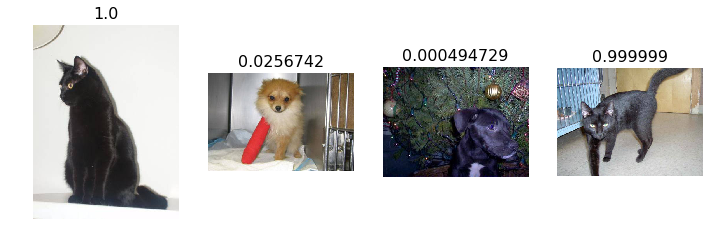

In [46]:
# 1. A few correct labels at random
correct = np.where(preds == val_labels[:,1])[0]
idx = permutation(correct)[:n_view]
plots_idx(idx, probs[idx])

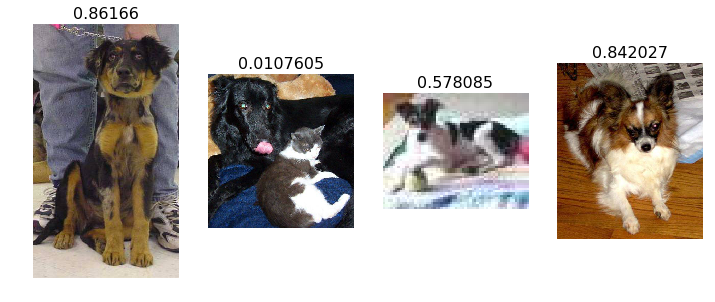

In [83]:
# 2. A few incorrect labels at random
incorrect = np.where(preds != val_labels[:, 1])[0]
idx = permutation(incorrect)[:n_view] 
plots_idx(idx, probs[idx])

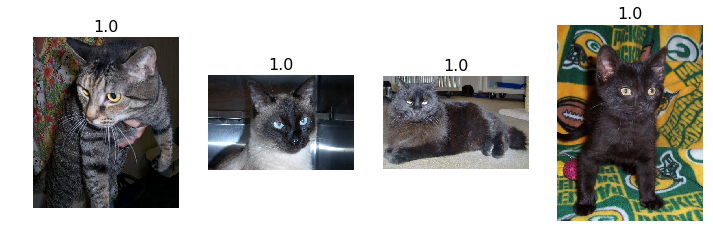

In [59]:
# 3. The images we most confident were, cats and are actually cats
correct_cats  = np.where((preds == 0) & (preds == val_labels[:, 1]))[0]
most_correct_cats = np.argsort(probs[correct_cats])[::-1][:n_view]   # sort by cat probabirity
plots_idx(correct_cats[most_correct_cats], probs[correct_cats][most_correct_cats])

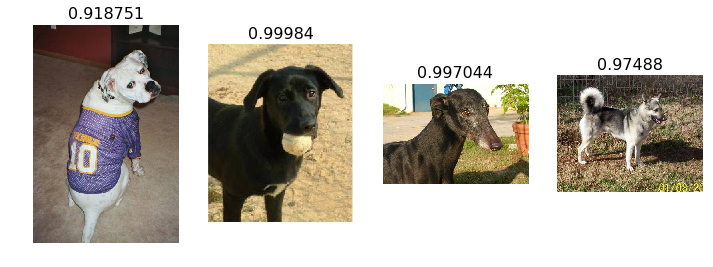

In [68]:
# 4. as above, but dogs
correct_dogs = np.where((preds == 1) & (preds == val_labels[:, 1]))[0]
most_correct_dogs = np.argsort(probs[correct_dogs][::-1])[:n_view]
plots_idx(correct_dogs[most_correct_dogs], 1 -  probs[correct_dogs][most_correct_dogs])

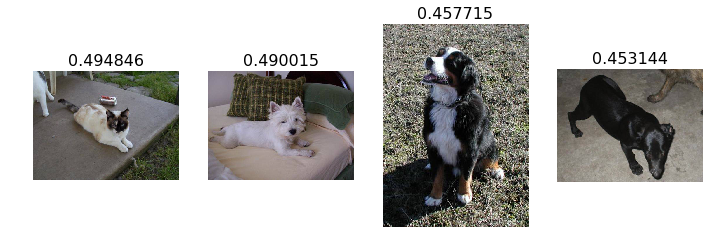

In [70]:
# 5. The most uncertain labels(ie those with probability closest to 0.5)
most_uncertain = np.argsort(np.abs(probs - 0.5))
plots_idx(most_uncertain[:n_view], probs[most_uncertain])

[[980  22]
 [ 26 972]]


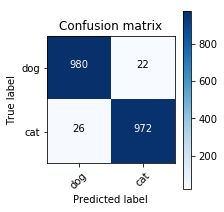

In [80]:
cm = confusion_matrix(val_classes, preds)
plot_confusion_matrix(cm, {'cat':0, 'dog': 1})

## Finetuning

In [6]:
# Instead of adding dense layer to the model, 
# replace the last layer for imagenet categories to dog or cat dense layer
model.pop()
for layer in model.layers: layer.trainable =False

In [ ]:
model.add(Dense(2, activation='softmax'))

In [19]:
# We have to recompile model after modifying the last Dense layer
model.compile(optimizer=RMSprop(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
vgg.fit(batches, val_batches, nb_epoch=3)

Epoch 1/3
23000/23000 [==============================] - 579s - loss: 0.6966 - acc: 0.9539 - val_loss: 0.3302 - val_acc: 0.9785
Epoch 2/3
23000/23000 [==============================] - 578s - loss: 0.5816 - acc: 0.9632 - val_loss: 1.0126 - val_acc: 0.9360
Epoch 3/3
23000/23000 [==============================] - 578s - loss: 0.5050 - acc: 0.9679 - val_loss: 0.3504 - val_acc: 0.9770
